# objective
The aim of this project is to develop a ml model that predicts the type of drug a patient should be prescribed based on their charcteristics such as  Sex, Age, Cholesttrol levels,Blood pressure,sodium and potassium levels 

# Description of dataset

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
data=pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
data.shape

(200, 6)

In [4]:
# basic exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# finding missing value
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# inferences
Dataset has 6 columns and 200 rows (entries), 4 of 6 are categorical(object) datatypes and 2 numerical are numerical data types.
There is no missing values in the dataset, where all observationns are complete,there is no need of  data imputations.


# EDA 

In [6]:
# description of numerical columns
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


d:\drugprediction\myenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

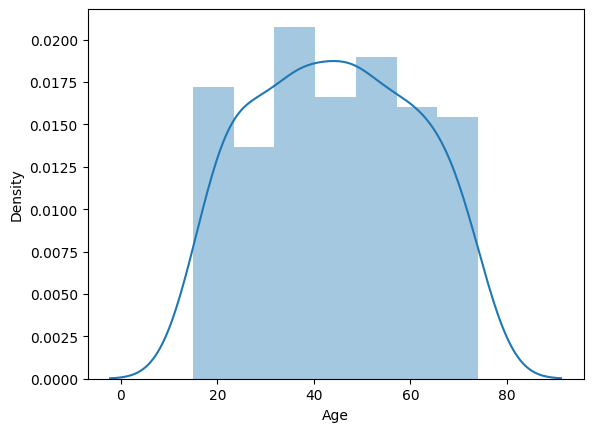

In [7]:
sns.distplot(data['Age'])

In [8]:
age_skew=data.Age.skew(axis=0,skipna=True)
age_skew

0.03030835703000607

Skewness of age column is 0.03 very close to 0,indicating that the age distribution is approximately symmetric(nearly normal distribution).
Minimum and maximum age are 15 and 74 years old respectively.Average age is 44 years old

In [9]:
skew_Na_to_K=data.Na_to_K.skew(axis=0,skipna=True)
skew_Na_to_K

1.039341186028881

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

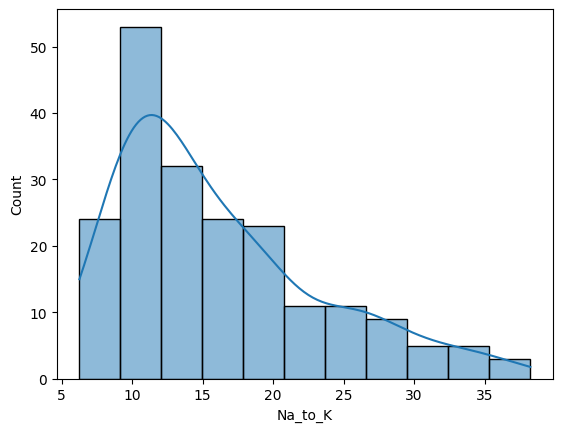

In [10]:
sns.histplot(data['Na_to_K'],kde=True)

Skewness of Na_to_K column is 1.03 moderately skewed distribution
Average value levels of 16.084485.minimum and maximum values are 6.269000 and 38.247000 respectively

# Categorical variables


In [11]:
data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Text(0, 0.5, 'Total')

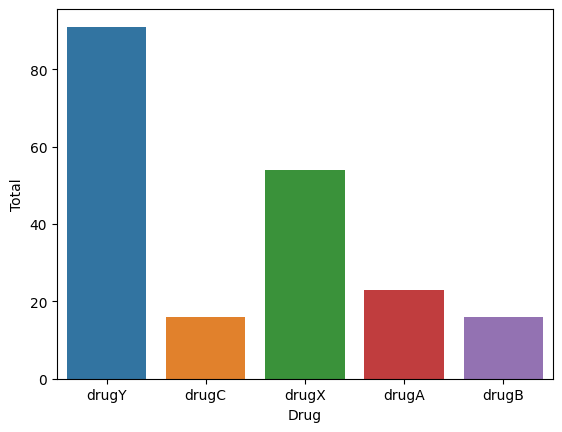

In [12]:
sns.countplot(x='Drug',data=data)
plt.xlabel('Drug')
plt.ylabel('Total')

In [13]:
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

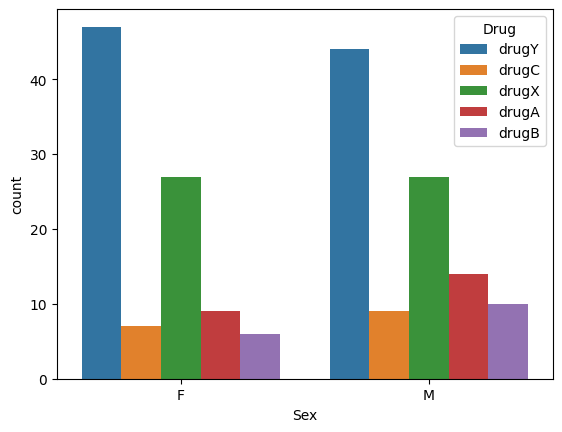

In [14]:
sns.countplot(x='Sex',hue='Drug',data=data)

In [15]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

Text(0, 0.5, 'Bp')

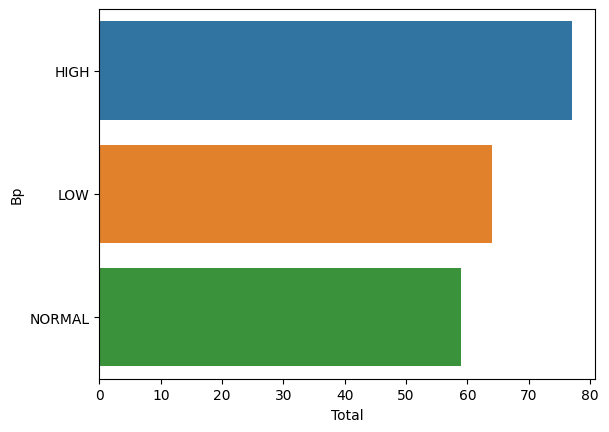

In [16]:
sns.countplot(y='BP',data=data)
plt.xlabel('Total')
plt.ylabel('Bp')

In [17]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Cholesterol'>

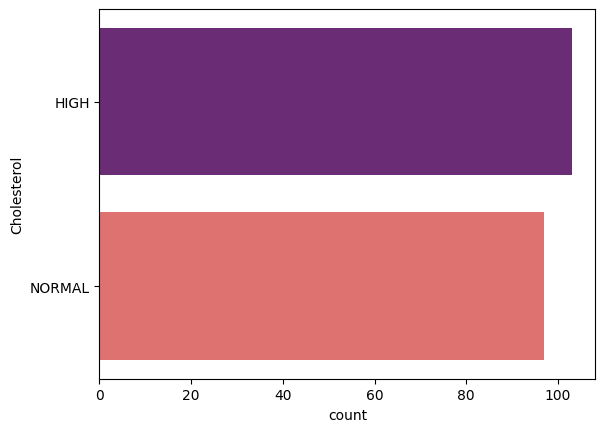

In [18]:
sns.countplot(y='Cholesterol',data=data,palette='magma')

DrugY has more amount than other drug types.
The distribution of patient gender is balanced(difference).
The distribution of blood pressure  is balanced(minimum difference)
The distribution of Cholesterol is balanced

<AxesSubplot:>

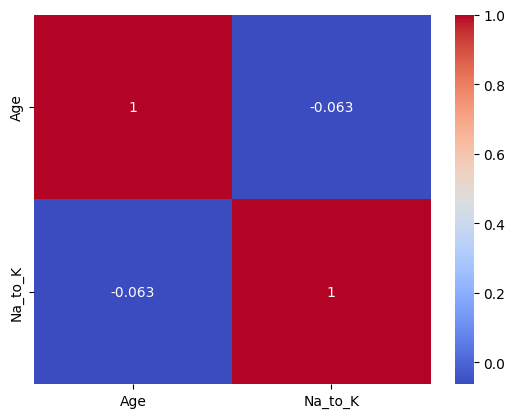

In [19]:
#correlation
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'BP based on drugl')

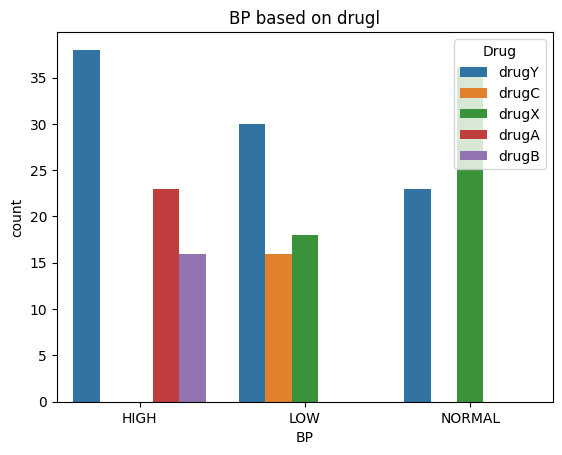

In [20]:
sns.countplot(x='BP',hue='Drug',data=data)
plt.title("BP based on drugl")